## Description

Expresso is an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each Expresso customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

This solution will help Expresso to better serve their customers by understanding which customers are at risk of leaving.

#### Variables definitions:
- user id
- REGION - the location of each client
- TENURE - duration in the network
- MONTANT - top-up amount
- FREQUENCE_RECH - number of times the customer refilled
- REVENUE - monthly income of each client
- ARPU_SEGMENT - income over 90 days / 3
- FREQUENCE - number of times the client has made an income
- DATA_VOLUME - number of connections
- ON_NET - inter expresso call
- ORANGE - call to orange
- TIGO - call to Tigo
- ZONE1 - call to zones1
- ZONE2 - call to zones2
- MRG - a client who is going
- REGULARITY - number of times the client is active for 90 days
- TOP_PACK	 - the most active packs
- FREQ_TOP_PACK- number of times the client  has activated the top pack packages
- CHURN - variable to predict - Target

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [21]:
data_train = pd.read_csv('Train.csv')

In [22]:
data_train.shape

(2154048, 19)

In [4]:
data_train.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [5]:
data_train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [6]:
data_train.count()

user_id           2154048
REGION            1304749
TENURE            2154048
MONTANT           1397309
FREQUENCE_RECH    1397309
REVENUE           1428000
ARPU_SEGMENT      1428000
FREQUENCE         1428000
DATA_VOLUME       1093615
ON_NET            1367373
ORANGE            1258800
TIGO               864032
ZONE1              169721
ZONE2              136824
MRG               2154048
REGULARITY        2154048
TOP_PACK          1251454
FREQ_TOP_PACK     1251454
CHURN             2154048
dtype: int64

In [23]:
# Are there any samples with all features, filled with NaN?

col = ['REGION', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'TOP_PACK'] 

for i in col:
   if i == 'REGION':
     cond = data_train[i].isna()
     mask = data_train[cond]
   else:
     cond = mask[i].isna()
     mask = mask[cond]  

mask.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
12,000068fe2aad763fb2667d253fa4c9e19e3b0636,NaN,G 12-15 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,1
17,0000a45ed15492427df603217166f1f813a2cc83,NaN,H 15-18 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,5,NaN,NaN,1
22,0000b4af921db374095a9e7ab87ee314522e4fe4,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
35,00012873b0a82e81b3155431769fa5ac0a8ac267,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,5,NaN,NaN,1


In [8]:
mask.count()

user_id           417863
REGION                 0
TENURE            417863
MONTANT                0
FREQUENCE_RECH         0
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME            0
ON_NET                 0
ORANGE                 0
TIGO                   0
ZONE1                  0
ZONE2                  0
MRG               417863
REGULARITY        417863
TOP_PACK               0
FREQ_TOP_PACK          0
CHURN             417863
dtype: int64

In [9]:
# Are this users active or inactive? 

mask['CHURN'].value_counts()

1    261776
0    156087
Name: CHURN, dtype: int64

In [10]:
data_train.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


### REGION

In [11]:
data_train['REGION'].unique()

array(['FATICK', nan, 'DAKAR', 'LOUGA', 'TAMBACOUNDA', 'KAOLACK', 'THIES',
       'SAINT-LOUIS', 'KOLDA', 'KAFFRINE', 'DIOURBEL', 'ZIGUINCHOR',
       'MATAM', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

In [12]:
data_train['REGION'].value_counts()

DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: REGION, dtype: int64

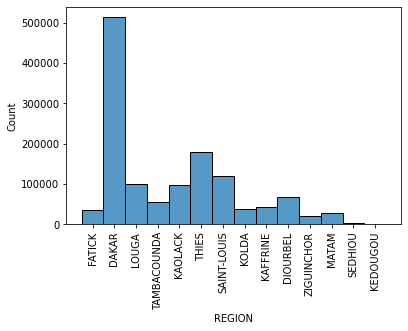

In [24]:
# What is the most frequent region?

region = data_train['REGION'].dropna()
sns.histplot(data=region, palette='viridis')
plt.xticks(rotation=90);

### TENURE

In [14]:
data_train['TENURE'].value_counts()

K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: TENURE, dtype: int64

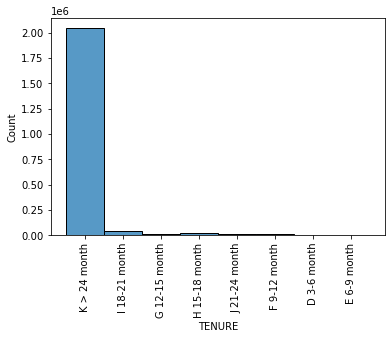

In [15]:
sns.histplot(data=data_train['TENURE'], palette= 'viridis')
plt.xticks(rotation=90);

### MONTANT, FREQUENCE_RECH

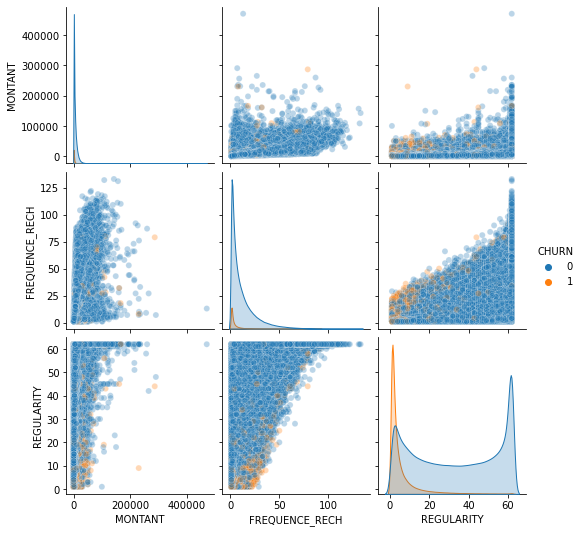

In [16]:
sns.pairplot(data_train, 
             vars = ['MONTANT', 'FREQUENCE_RECH', 'REGULARITY'],
             hue = 'CHURN',
             kind = 'scatter',
             plot_kws=dict(alpha=0.3),
             palette = 'tab10');

### REVENUE, ARPU_SEGMENT, FREQUENCE

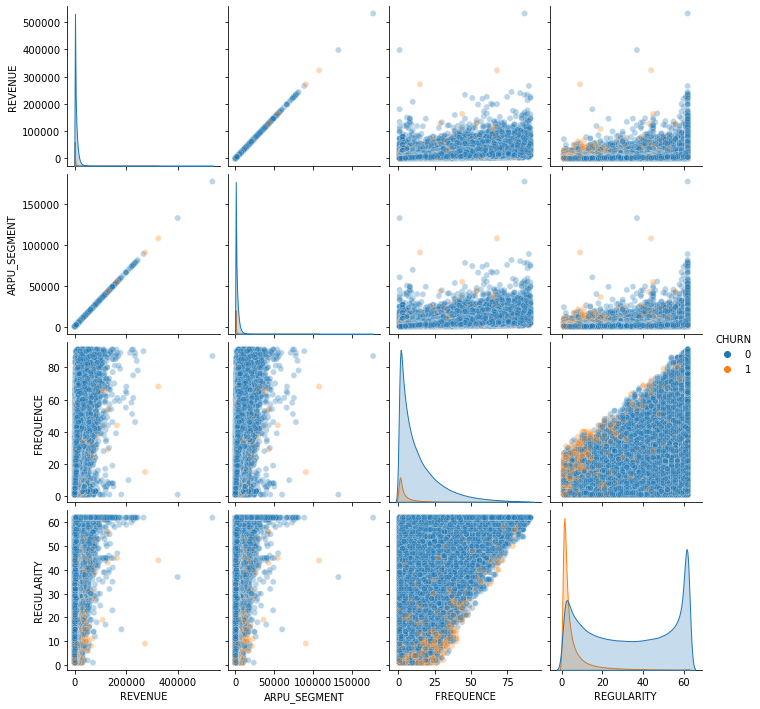

In [20]:
sns.pairplot(data_train, 
             vars = ['REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'REGULARITY'],
             hue = 'CHURN',
             kind = 'scatter',
             plot_kws=dict(alpha=0.3),
             palette = 'tab10');

### DATA_VOLUME

### MRG

In [17]:
print(data_train['MRG'].nunique())

1


In [25]:
# we can  drop MRG column both in train and test sets

data_train.drop(['MRG'], axis = 1, inplace=True)

### REGULARITY

<AxesSubplot:xlabel='REGULARITY', ylabel='Count'>

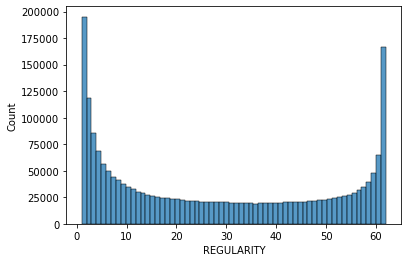

In [100]:
# What is the regularity distribution?

sns.histplot(data=data_train['REGULARITY'], bins=(data_train['REGULARITY'].max()), palette = 'viridis');

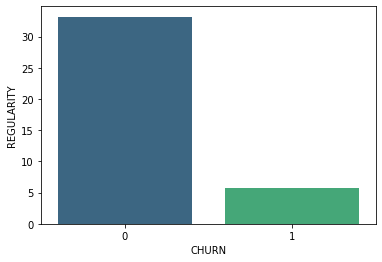

In [26]:
# What is the mean regularity of those who became inactive?

churn_reg = data_train.groupby(['CHURN'])['REGULARITY'].mean()

df_churn_reg = pd.DataFrame(churn_reg.reset_index())
sns.barplot(data = df_churn_reg, x = 'CHURN', y = 'REGULARITY', palette = 'viridis');

In [27]:
# How often on average users with different favorite package use the service? 

pack_reg = data_train.groupby(['TOP_PACK'])['REGULARITY'].mean().sort_values(ascending = False)

In [28]:
pack_reg_Q2 = pack_reg.quantile(0.2)
pack_reg_Q4 = pack_reg.quantile(0.4)
pack_reg_Q6 = pack_reg.quantile(0.6)
pack_reg_Q8 = pack_reg.quantile(0.8)

print(pack_reg_Q2,  pack_reg_Q4,  pack_reg_Q6,  pack_reg_Q8)

24.866666666666667 35.340489044141 40.52846051248953 46.61538461538462


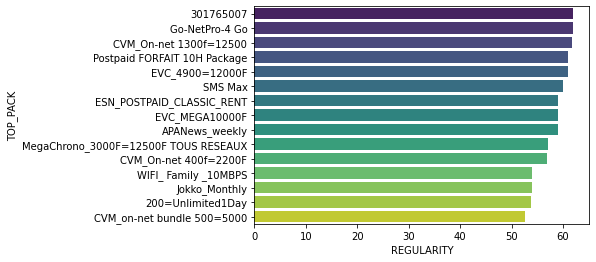

In [29]:
df_pack_reg = pd.DataFrame(pack_reg.reset_index())

sns.barplot(data = df_pack_reg.head(15), x = 'REGULARITY', y= 'TOP_PACK', palette = 'viridis');

### TOP_PACK

In [50]:
data_train['TOP_PACK'].value_counts(normalize=True)

All-net 500F=2000F;5d             2.539462e-01
On net 200F=Unlimited _call24H    1.216944e-01
Data:490F=1GB,7d                  9.203694e-02
Data: 100 F=40MB,24H              6.764052e-02
Mixt 250F=Unlimited_call24H       5.394685e-02
                                      ...     
CVM_150F_unlimited                7.990705e-07
YMGX on-net 100=700F, 24H         7.990705e-07
Postpaid FORFAIT 10H Package      7.990705e-07
pilot_offer5                      7.990705e-07
Package3_Monthly                  7.990705e-07
Name: TOP_PACK, Length: 140, dtype: float64

In [71]:
data_train['TOP_PACK'].value_counts().nunique()

99

In [67]:
popularPacks = data_train['TOP_PACK'].value_counts(normalize=True).iloc[:5]
popularPacks

All-net 500F=2000F;5d             0.253946
On net 200F=Unlimited _call24H    0.121694
Data:490F=1GB,7d                  0.092037
Data: 100 F=40MB,24H              0.067641
Mixt 250F=Unlimited_call24H       0.053947
Name: TOP_PACK, dtype: float64

In [68]:
popularPacks.sum()

0.5892649669903968

In [70]:
popularPacks = popularPacks.index.to_list()
popularPacks

['All-net 500F=2000F;5d',
 'On net 200F=Unlimited _call24H',
 'Data:490F=1GB,7d',
 'Data: 100 F=40MB,24H',
 'Mixt 250F=Unlimited_call24H']

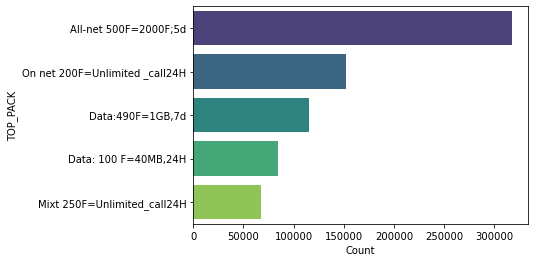

In [31]:
# TOP packs
top_pack = data_train['TOP_PACK'].value_counts()

df_top_pack = pd.DataFrame(top_pack.reset_index())

sns.barplot(data = df_top_pack.head(5), x = 'TOP_PACK', y= 'index', palette = 'viridis').set(xlabel='Count',ylabel='TOP_PACK');

In [32]:
# Users with which favorite packages became inactive?

data_train.groupby(['CHURN'])['TOP_PACK'].value_counts()

CHURN  TOP_PACK                                    
0      All-net 500F=2000F;5d                           307522
       On net 200F=Unlimited _call24H                  149405
       Data:490F=1GB,7d                                107901
       Data: 100 F=40MB,24H                             80732
       Mixt 250F=Unlimited_call24H                      64667
                                                        ...  
1      GPRS_3000Equal10GPORTAL                              1
       GPRS_PKG_5GO_ILLIMITE                                1
       MIXT: 5000F=80Konnet_20Koffnet_250Mo;30d\t\t         1
       pack_chinguitel_24h                                  1
       pilot_offer7                                         1
Name: TOP_PACK, Length: 238, dtype: int64

In [88]:
montant = data_train.groupby(['REGULARITY'])['MONTANT'].mean().sort_values(ascending = False)
montant

REGULARITY
62    14660.103388
61    10732.610134
60     9522.823747
59     8736.001261
58     8146.365698
          ...     
5      1003.038040
4       977.684434
3       956.931832
2       883.332510
1       823.494208
Name: MONTANT, Length: 62, dtype: float64

In [92]:
df_montant = pd.DataFrame(montant.reset_index())

In [93]:
freq_rech = data_train.groupby(['REGULARITY'])['FREQUENCE_RECH'].mean().sort_values(ascending = False)
freq_rech

REGULARITY
62    27.511555
61    22.152134
60    20.091386
59    18.609853
58    17.576323
        ...    
5      2.040219
4      1.943801
3      1.829849
2      1.763284
1      1.615111
Name: FREQUENCE_RECH, Length: 62, dtype: float64

In [35]:
df_freq_rech = pd.DataFrame(freq_rech.reset_index())

In [36]:
revenue = data_train.groupby(['REGULARITY'])['REVENUE'].mean().sort_values(ascending = False)
df_revenue = pd.DataFrame(revenue.reset_index())

In [37]:
arpu_segment = data_train.groupby(['REGULARITY'])['ARPU_SEGMENT'].mean().sort_values(ascending = False)
df_arpu_segment = pd.DataFrame(arpu_segment.reset_index())

In [38]:
frequence = data_train.groupby(['REGULARITY'])['FREQUENCE'].mean().sort_values(ascending = False)
df_frequence = pd.DataFrame(frequence.reset_index())

### Preparation of data

In [114]:
# Drop features

# data_train.drop(['MONTANT','REVENUE', 'FREQUENCE', 'user_id' ], axis = 1, inplace=True)

In [43]:
data_train.REGION.count()

1304749

In [46]:
# Fill NA in REGION with most 'not stated' because there are too much of them.

data_train.REGION.fillna('NOT STATED', inplace=True)

In [47]:
# Transform TENURE column in binary one: 1 if duration >24 months, else 0
tenureBig = data_train.TENURE == 'K > 24 month'
data_train.loc[tenureBig, 'TENURE'] = 1
data_train.loc[~tenureBig, 'TENURE'] = 0

In [72]:
# Fill NA in TOP_PACK

data_train.loc[~data_train.TOP_PACK.isin(popularPacks), 'TOP_PACK'] = 'other'

In [77]:
# Fill NA in FREQ_TOP_PACK
meanFreqPerPack = data_train.groupby(['TOP_PACK'])['FREQ_TOP_PACK'].mean()
meanFreqPerPack

TOP_PACK
All-net 500F=2000F;5d              8.665934
Data: 100 F=40MB,24H              13.665915
Data:490F=1GB,7d                   6.490649
Mixt 250F=Unlimited_call24H       11.775714
On net 200F=Unlimited _call24H    10.809659
other                              8.763054
Name: FREQ_TOP_PACK, dtype: float64

In [80]:
meanFreqOther = meanFreqPerPack.loc['other']
meanFreqOther

8.76305406835585

In [81]:
data_train['FREQ_TOP_PACK'].fillna(meanFreqOther, inplace=True)

In [198]:
# Fill NA in MONTANT

#data_train['MONTANT'] = np.where(data_train['MONTANT'].isna(),
                                       #data_train['REGULARITY'].apply(lambda x: ((df_montant.MONTANT.loc[df_montant['REGULARITY'] == x]).iloc[0])).astype(float),
                                       #data_train['MONTANT'])

In [197]:
# Fill NA in FREQ_TOP_PACK

#data_train['FREQ_TOP_PACK'] = np.where(data_train['FREQ_TOP_PACK'].isna(),
                                       #data_train['TOP_PACK'].apply(lambda x: ((df_frq_top_pack.FREQ_TOP_PACK.loc[df_frq_top_pack['TOP_PACK'] == x]).iloc[0])).astype(float),
                                       #data_train['FREQ_TOP_PACK'])

In [100]:
# Fill NA in FREQUENCE_RECH

data_train.loc[
    data_train['FREQUENCE_RECH'].isna(), 'FREQUENCE_RECH'
] = data_train['REGULARITY'].apply(
    lambda x: (df_freq_rech.FREQUENCE_RECH.loc[df_montant['REGULARITY'] == x]).iloc[0]
).astype(float)

In [103]:
data_train.FREQUENCE_RECH.count()

2154048

In [200]:
# Fill NA in REVENUE

#data_train['REVENUE'] = np.where(data_train['REVENUE'].isna(),
                                       #data_train['REGULARITY'].apply(lambda x: ((df_revenue.REVENUE.loc[df_montant['REGULARITY'] == x]).iloc[0])).astype(float),
                                       #data_train['REVENUE'])

In [104]:
# Fill NA in ARPU_SEGMENT

data_train['ARPU_SEGMENT'] = np.where(data_train['ARPU_SEGMENT'].isna(),
                                       data_train['REGULARITY'].apply(lambda x: ((df_arpu_segment.ARPU_SEGMENT.loc[df_montant['REGULARITY'] == x]).iloc[0])).astype(float),
                                       data_train['ARPU_SEGMENT'])

In [105]:
# Fill NA in FREQUENCE

#data_train['FREQUENCE'] = np.where(data_train['FREQUENCE'].isna(),
                                       #data_train['REGULARITY'].apply(lambda x: ((df_frequence.FREQUENCE.loc[df_montant['REGULARITY'] == x]).iloc[0])).astype(float),
                                       #data_train['FREQUENCE'])

In [106]:
# Fill NA in DATA_VOLUME, ON_NET, ORANGE, TIGO, ZONE1, ZONE2

data_train['DATA_VOLUME'] = data_train['DATA_VOLUME'].fillna(0)
data_train['ON_NET'] = data_train['ON_NET'].fillna(0)
data_train['ORANGE'] = data_train['ORANGE'].fillna(0)
data_train['TIGO'] = data_train['TIGO'].fillna(0)
data_train['ZONE1'] = data_train['ZONE1'].fillna(0)
data_train['ZONE2'] = data_train['ZONE2'].fillna(0)

In [107]:
data_train.head(10)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,1,4250.0,15.000000,4251.0,1417.000000,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,On net 200F=Unlimited _call24H,8.000000,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NOT STATED,0,NaN,1.943801,NaN,272.036986,NaN,0.0,0.0,0.0,0.0,0.0,0.0,4,other,8.763054,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NOT STATED,1,3600.0,2.000000,1020.0,340.000000,2.0,0.0,90.0,46.0,7.0,0.0,0.0,17,other,1.000000,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,1,13500.0,15.000000,13502.0,4501.000000,18.0,43804.0,41.0,102.0,2.0,0.0,0.0,62,other,11.000000,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,1,1000.0,1.000000,985.0,328.000000,1.0,0.0,39.0,24.0,0.0,0.0,0.0,11,Mixt 250F=Unlimited_call24H,2.000000,0
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,1,8500.0,17.000000,9000.0,3000.000000,18.0,0.0,252.0,70.0,91.0,0.0,0.0,62,other,18.000000,0
6,00002b0ed56e2c199ec8c3021327229afa70f063,LOUGA,1,NaN,1.763284,NaN,240.002187,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2,other,8.763054,0
7,0000313946b6849745963442c6e572d47cd24ced,DAKAR,1,7000.0,16.000000,7229.0,2410.000000,22.0,1601.0,77.0,29.0,100.0,0.0,0.0,55,All-net 500F=2000F;5d,8.000000,0
8,0000398021ccd3a488fa1a63dee3b2f0d471f9fd,DAKAR,1,1500.0,3.000000,1502.0,501.000000,12.0,0.0,2.0,53.0,2.0,0.0,0.0,31,other,8.763054,0
9,00003d165737109921ebd21f883cb8cff028b626,TAMBACOUNDA,1,4000.0,8.000000,4000.0,1333.000000,8.0,0.0,1620.0,9.0,0.0,0.0,0.0,45,other,8.000000,0


In [108]:
data_train.dtypes

user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object

In [110]:
data_train.TENURE.value_counts()

1    2043201
0     110847
Name: TENURE, dtype: int64

In [111]:
data_train.TENURE = data_train.TENURE.astype(int)

In [112]:
data_train.dtypes

user_id            object
REGION             object
TENURE              int32
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object

In [113]:
# Transform categorical features

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

encoded_features = pd.DataFrame(ohe.fit_transform(data_train[['REGION', 'TOP_PACK']]))


reg_cols = [f'reg_{cat}' for cat in ohe.categories_[0]]
tp_cols = [f'top_{cat}' for cat in ohe.categories_[1]]


dummy_cols_names = [*reg_cols, *tp_cols]
encoded_features.columns = dummy_cols_names

data_train.drop(['REGION', 'TOP_PACK'], axis=1, inplace=True)
data_train = pd.concat([data_train, encoded_features], axis=1)

In [114]:
data_train.dtypes

user_id                                object
TENURE                                  int32
MONTANT                               float64
FREQUENCE_RECH                        float64
REVENUE                               float64
ARPU_SEGMENT                          float64
FREQUENCE                             float64
DATA_VOLUME                           float64
ON_NET                                float64
ORANGE                                float64
TIGO                                  float64
ZONE1                                 float64
ZONE2                                 float64
REGULARITY                              int64
FREQ_TOP_PACK                         float64
CHURN                                   int64
reg_DAKAR                             float64
reg_DIOURBEL                          float64
reg_FATICK                            float64
reg_KAFFRINE                          float64
reg_KAOLACK                           float64
reg_KEDOUGOU                      

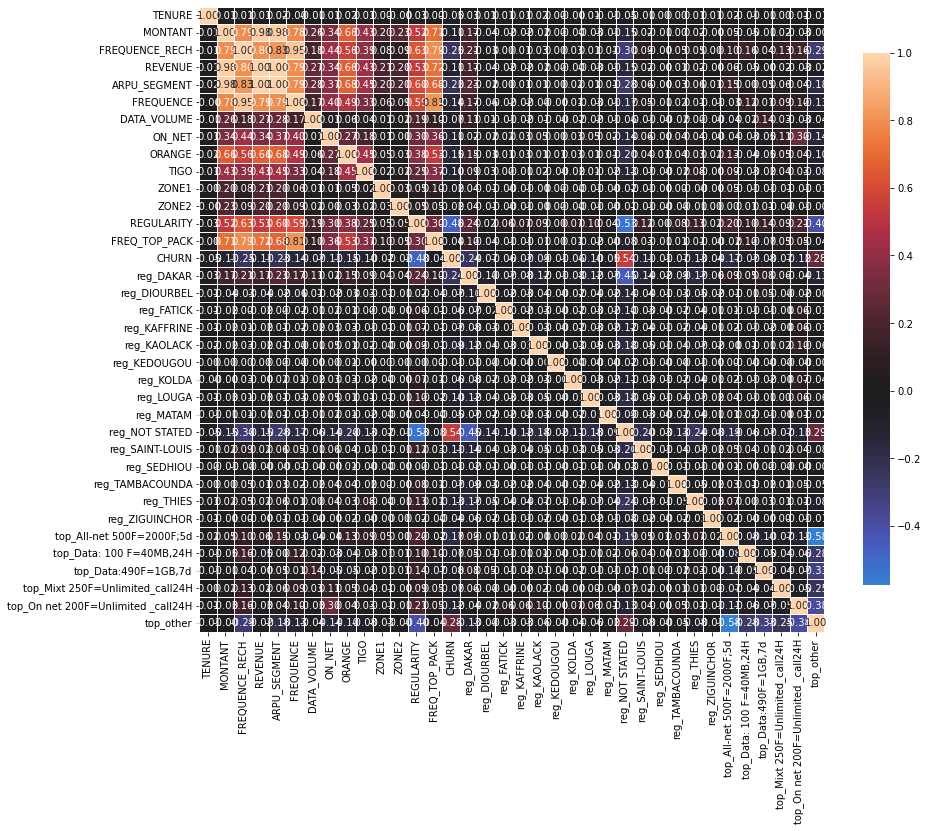

In [118]:
# Drop some correlating stuff cause adds no info.
plt.subplots(figsize=(14, 14))
sns.heatmap(
    data_train.corr(),
    vmax=1.0,
    center=0,
    fmt='.2f',
    square=True,
    linewidths=.5,
    annot=True,
    cbar_kws={"shrink": .7}
);
# Drop everything close to yellow.

In [140]:
# Drop MONTANT and REVENUE (correlate with ARPU_SEGMENT).
# Drop FREQUENCE (correlates with FREQUENCE_RECH).
# Drop user_id because it's useless.
data_processed = data_train.drop(
    labels=['MONTANT', 'REVENUE', 'FREQUENCE', 'user_id'],
    axis=1,
)

In [141]:
# data_processed.to_csv('preprocessed.csv')

In [142]:
# Scale numerical features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_processed)

StandardScaler()

In [143]:
data_scaled = scaler.transform(data_processed)

In [145]:
data_processed.count()

TENURE                                2154048
FREQUENCE_RECH                        2154048
ARPU_SEGMENT                          2154048
DATA_VOLUME                           2154048
ON_NET                                2154048
ORANGE                                2154048
TIGO                                  2154048
ZONE1                                 2154048
ZONE2                                 2154048
REGULARITY                            2154048
FREQ_TOP_PACK                         2154048
CHURN                                 2154048
reg_DAKAR                             2154048
reg_DIOURBEL                          2154048
reg_FATICK                            2154048
reg_KAFFRINE                          2154048
reg_KAOLACK                           2154048
reg_KEDOUGOU                          2154048
reg_KOLDA                             2154048
reg_LOUGA                             2154048
reg_MATAM                             2154048
reg_NOT STATED                    

In [148]:
X_train = data_processed.drop('CHURN', axis=1)
y_train = data_processed.CHURN

In [149]:
import xgboost as xgb

In [150]:
dataDM = xgb.DMatrix(X_train, label=y_train)

In [173]:
xg = xgb.XGBClassifier(
    learning_rate=.15,
    max_depth=10,
    n_estimators=150,
    verbosity=1,
)

In [174]:
xg.fit(X_train, y_train)

C:\Users\kuzne\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:23:12] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.15, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [175]:
y_train_pred = xg.predict(X_train)

In [176]:
y_train_pred.shape

(2154048,)

In [177]:
y_train

0          0
1          1
2          0
3          0
4          0
          ..
2154043    0
2154044    0
2154045    1
2154046    0
2154047    1
Name: CHURN, Length: 2154048, dtype: int64

In [178]:
from sklearn.metrics import accuracy_score

In [179]:
accuracy_score(y_train, y_train_pred)

0.8826080013073061

In [180]:
X_test = pd.read_csv('Test.csv')

In [181]:
X_test

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,1333.0,8.0,1587.0,26.0,250.0,1.0,NaN,NaN,NO,53,Mixt 250F=Unlimited_call24H,5.0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,K > 24 month,3950.0,7.0,3949.0,1316.0,10.0,1724.0,25.0,71.0,NaN,NaN,NaN,NO,15,IVR Echat_Daily_50F,6.0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,NaN,K > 24 month,3850.0,18.0,3955.0,1318.0,23.0,2962.0,0.0,7.0,NaN,NaN,NaN,NO,29,"Data: 100 F=40MB,24H",11.0


In [182]:
y_pred = xg.predict(X_test)

ValueError: Feature shape mismatch, expected: 32, got 18